In [1]:
import pandas as pd
import numpy as np

import datetime, warnings, scipy 
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
import matplotlib.colors as colors
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from mpl_toolkits.basemap import Basemap
import shapefile


import warnings
warnings.filterwarnings(action='once')

In [2]:
#loading documents
df_paris = pd.read_csv('Data/df_Paris_Processed.csv',low_memory=False)
df_lyon = pd.read_csv('Data/df_Lyon_Processed.csv',low_memory=False)
df_marseille = pd.read_csv('Data/df_Marseille_Processed.csv',low_memory=False)
df_toulouse = pd.read_csv('Data/df_Toulouse_Processed.csv',low_memory=False)

<frozen importlib._bootstrap>:914: ImportWarning: _SixMetaPathImporter.find_spec() not found; falling back to find_module()


In [3]:
df_paris.drop(['index_right', 'year', 'reg_code', 'reg_name', 'dep_code', 'dep_name',
       'arrdep_code', 'bv2012_code', 'bv2012_name', 'epci_code', 'epci_name',
       'com_code', 'com_name', 'com_arm_cod', 'com_arm_nam',
       'iris_name', 'iris_name_u', 'iris_name_l', 'iris_area_c', 'iris_type',
       'iris_grd_qu', 'iris_in_ctu'], axis = 1, inplace = True)

In [4]:
df_paris['iris_code'] = df_paris['iris_code'].str[2:11]
df_paris.dropna(inplace = True)

In [5]:
print(df_paris['iris_code'])

0         751031102
1         751031102
2         751031102
3         751031102
4         751031102
            ...    
144536    751134904
144537    751134904
144538    751124704
144539    751124704
144540    751135013
Name: iris_code, Length: 144541, dtype: object


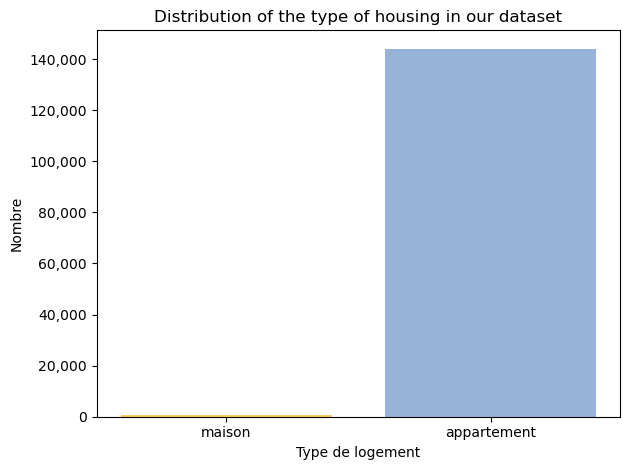

In [7]:
import matplotlib.ticker as ticker
counts = df_paris["code_type_local"].value_counts()

plt.bar(counts.index, counts.values, color=['#98B3D8','#FFCB64'])
plt.xticks([1, 2], ['maison', 'appartement'])
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.xlabel("Type de logement")
plt.ylabel("Nombre")
plt.title("Distribution of the type of housing in our dataset")
plt.tight_layout()
plt.show()

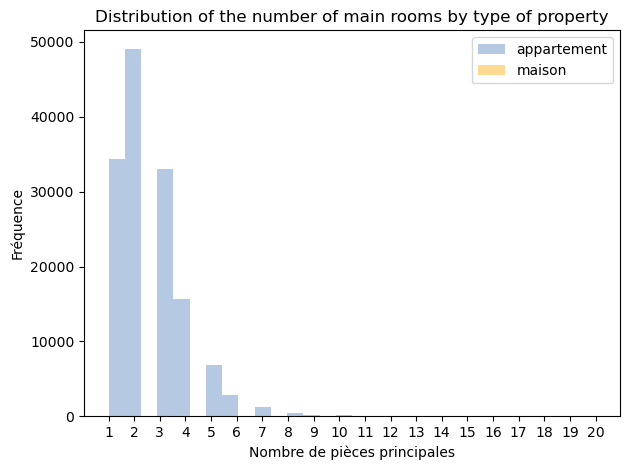

In [8]:
appartements = df_paris[df_paris["code_type_local"] == 2]["nombre_pieces_principales"]
maisons = df_paris[df_paris["code_type_local"] == 1]["nombre_pieces_principales"]

fig, ax = plt.subplots()
ax.hist(appartements, bins=30, alpha=0.7, label="appartement", color='#98B3D8')
ax.hist(maisons, bins=30, alpha=0.7, label="maison", color='#FFCB64')

ax.set_xlabel("Nombre de pièces principales")
ax.set_ylabel("Fréquence")
ax.set_xticks(range(int(min(min(appartements), min(maisons))), int(max(max(appartements), max(maisons))) + 1))
ax.set_title("Distribution of the number of main rooms by type of property")
ax.legend()
plt.tight_layout()
plt.show()

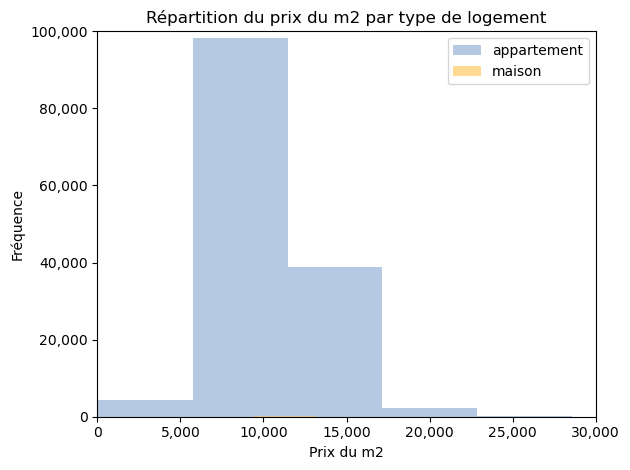

In [18]:
appartements = df_paris[df_paris["code_type_local"] == 2]["Prix_m2"]
maisons = df_paris[df_paris["code_type_local"] == 1]["Prix_m2"]

fig, ax = plt.subplots()
ax.hist(appartements, bins=30, alpha=0.7, label="appartement", color='#98B3D8')
ax.hist(maisons, bins=30, alpha=0.7, label="maison", color='#FFCB64')
plt.xlim(0, 30000)
plt.ylim(0, 100000)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
ax.set_xlabel("Prix du m2")
ax.set_ylabel("Fréquence")
ax.set_title("Répartition du prix du m2 par type de logement")
ax.legend()
plt.tight_layout()
plt.show()

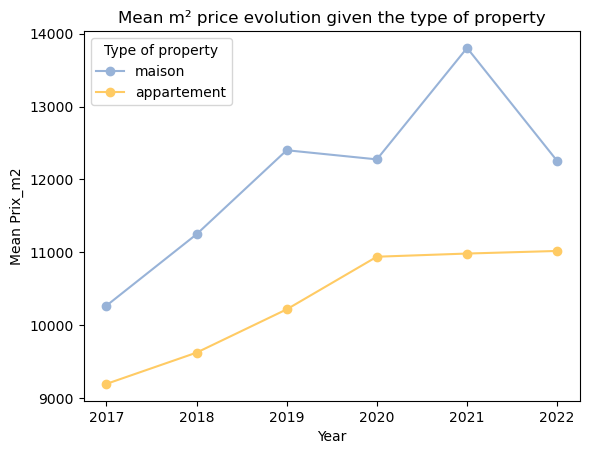

In [19]:
import matplotlib.pyplot as plt

# Filter data to only include relevant columns and code_type_local values
df_filtered = df_paris[['code_type_local', 'Prix_m2', 'Year']]
df_filtered = df_filtered[df_filtered['code_type_local'].isin([1, 2])]

# Calculate mean "Prix_m2" for each year and code_type_local combination
df_means = df_filtered.groupby(['code_type_local', 'Year'])['Prix_m2'].mean().unstack(level=0)

# Plot the mean "Prix_m2" for each code_type_local as a separate curve
fig, ax = plt.subplots()
df_means.plot(ax=ax, color=['#98B3D8', '#FFCB64'], marker='o')

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Mean Prix_m2')
ax.legend(title='Type of property', labels=['maison', 'appartement'])
ax.set_title("Mean m² price evolution given the type of property")

# Show plot
plt.show()